In [1]:
#Импортируем нужные для чтения и первичного анализа библиотеки и прочитаем файл:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

import warnings; warnings.simplefilter('ignore') #отключим выведение на экран предупреждающих сообщений

%matplotlib inline

pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок

math = pd.read_csv('stud_math.csv')

In [2]:
#Рассмотрим, какие данные хранятся в файле и какие типы данных у столбцов:

display(math.head(10))
math.info()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

In [3]:
#В файле 13 числовых и 17 строковых столбцов

#Проведем первичный анализ данных в столбцах

#Переименуем некоторые столбцы для дальнейшего удобства:

math.columns = ['school', 'sex', 'age', 'address', 'family_size', 'parents_status',
                'mothers_education', 'fathers_education', 'mothers_job', 'fathers_job',
                'school_reason', 'guardian', 'traveltime', 'studytime', 'failures', 
                'school_support', 'family_support', 'paid_classes','activities', 
                'nursery', 'studytime_granular', 'higher_education', 'internet_presence','romantic_relationship', 
                'family_relationship', 'free_time', 'going_out', 'health', 'absences', 'score']

In [4]:
#Найдём колонки с пропущенными значениями:

math.isnull().sum().sort_values(ascending=False)

parents_status           45
paid_classes             40
family_support           39
fathers_job              36
internet_presence        34
romantic_relationship    31
guardian                 31
traveltime               28
family_size              27
family_relationship      27
fathers_education        24
failures                 22
higher_education         20
mothers_job              19
school_reason            17
address                  17
nursery                  16
health                   15
activities               14
absences                 12
free_time                11
school_support            9
going_out                 8
studytime                 7
studytime_granular        7
score                     6
mothers_education         3
age                       0
sex                       0
school                    0
dtype: int64

In [18]:
#Так как score - главная целевая переменная, логичнее будет убрать строки с неизвестными оценками:

math=math.dropna(subset=['score'])

In [21]:
#Напишем функцию замены нулевого значения в числовых столбцах на медиану:

def change_numeric(column):
    math[column] = math[column].apply(lambda x: math[column].median()
                                                if pd.isna(x)== True else x)
columns_list_numeric = math.select_dtypes(include='number').columns #наши числовые столбцы
for column in columns_list_numeric:
    change_numeric(column)

In [22]:
#Таким же способом для номинативных переменных:

def change_nominative(column):
    math[column] = math[column].apply(lambda x: math[column].value_counts().index[0] 
                                                if pd.isna(x)== True else x)
columns_list_nominative = math.select_dtypes(exclude='number').columns
for column in columns_list_nominative:
    change_nominative(column)

In [23]:
#Проверим:

math.isnull().sum().sort_values(ascending=False)

score                    0
absences                 0
sex                      0
age                      0
address                  0
family_size              0
parents_status           0
mothers_education        0
fathers_education        0
mothers_job              0
fathers_job              0
school_reason            0
guardian                 0
traveltime               0
studytime                0
failures                 0
school_support           0
family_support           0
paid_classes             0
activities               0
nursery                  0
studytime_granular       0
higher_education         0
internet_presence        0
romantic_relationship    0
family_relationship      0
free_time                0
going_out                0
health                   0
school                   0
dtype: int64

In [46]:
#Рассмотрим числовые столбцы на возможные ошибки или опечатки

math.fathers_education.describe()
math.fathers_education.value_counts()

3.0     118
2.0     105
4.0      88
1.0      75
0.0       2
40.0      1
Name: fathers_education, dtype: int64

In [49]:
#Видим один параметр, равный 40, при том, что этот показатель рассматривается от 1 до 4.
#Сделаем предположение, что это опечатка и показатель на самом деле равен 4

math.loc[math['fathers_education'] == 40, 'fathers_education'] = 4

In [51]:
#Проверим:

math.fathers_education.value_counts()

3.0    118
2.0    105
4.0     89
1.0     75
0.0      2
Name: fathers_education, dtype: int64

In [70]:
#family_relationship

math.family_relationship.value_counts()

 4.0    205
 5.0     97
 3.0     62
 2.0     17
 1.0      7
-1.0      1
Name: family_relationship, dtype: int64

In [71]:
#Семейные отношения измеряются от 1 до 5
#Заменим -1 на 1, так же, как и выше, предположив, что это опечатка

math.loc[math['family_relationship'] == -1, 'family_relationship'] = 1

In [72]:
#Проверим:

math.family_relationship.value_counts()

4.0    205
5.0     97
3.0     62
2.0     17
1.0      8
Name: family_relationship, dtype: int64

In [77]:
#Корреляционный анализ
#Выясним, какие столбцы коррелируют с оценкой по математике, чтобы понять, какие параметры оставить, а какие - нет.

#Сначала вычислим коэффициенты корреляции между количественными признаками, содержащимися в датафрейме, 
#с помощью метода corr(). Результат вычислений сохраним в новом датафрейме correlation:

correlation = math.corr()

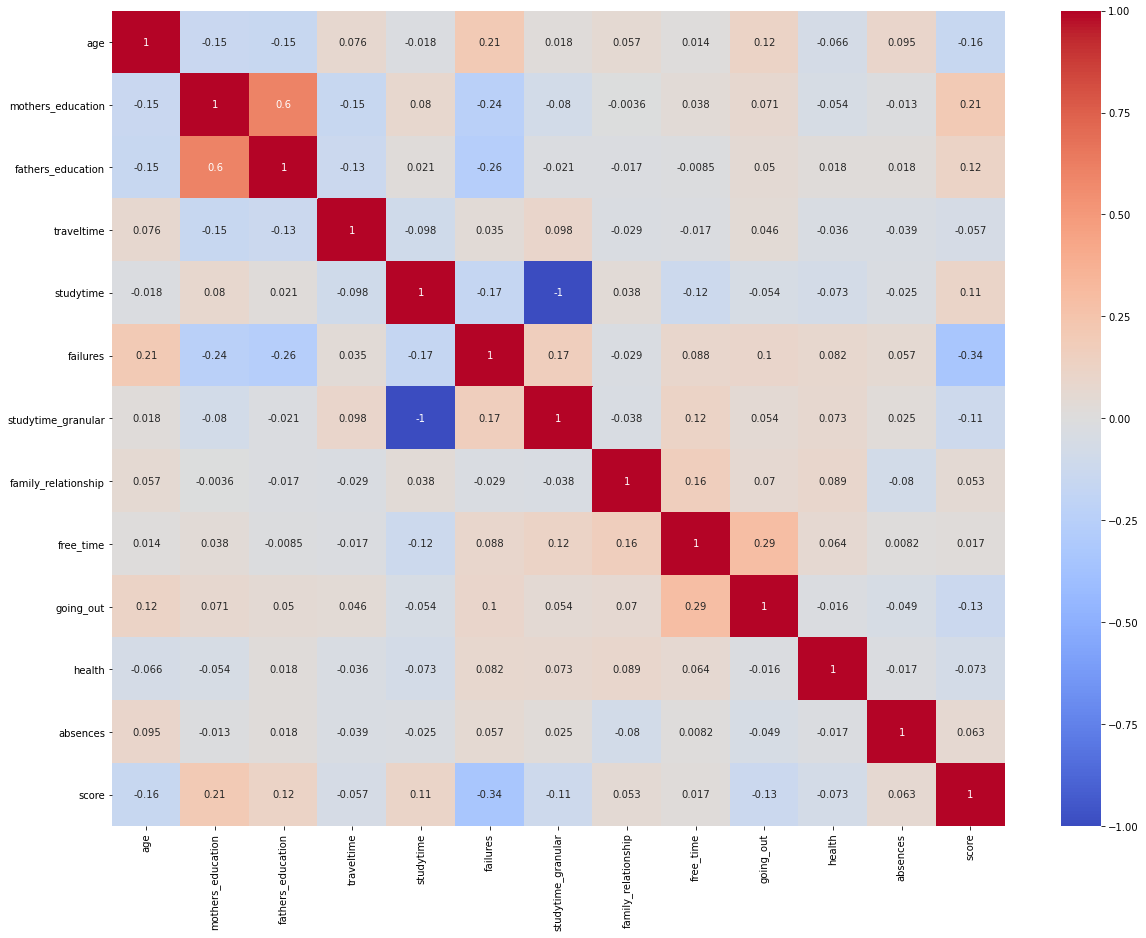

In [78]:
#Для отображения информации воспользуемся тепловой картой:

plt.subplots(figsize=(20,15))
sns.heatmap(correlation,annot=True,cmap='coolwarm')


In [82]:
#Наблюдаем строгую отрицательную корреляцию (-1) между параметром studytime и неизвестной величиной studytime_granular.
#Это означает, что при увеличении одного параметра, второй уменьшается. 
#Уберем этот параметр из дальнейшего построения модели, так как нам хватит одного показателя, определяющего время на учебу.

#Видим высокую корреляцию между mothers_education и fathers_educations в размере 0.6. 
#Эти показатели оставим, т.к. их схожесть довольно объяснима и понятно.

#Больше не видим высоких показателей корреляции, а значит, числовые параметры остаются для включения в модель.

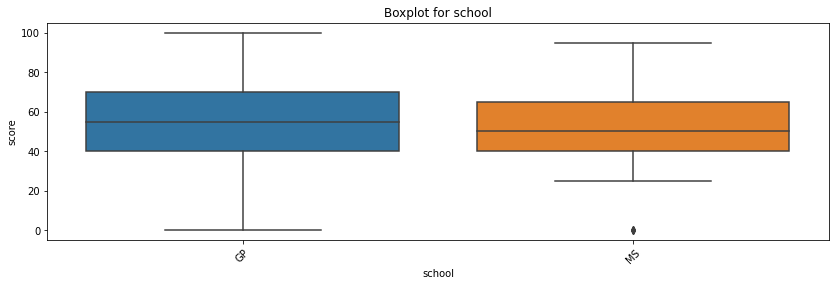

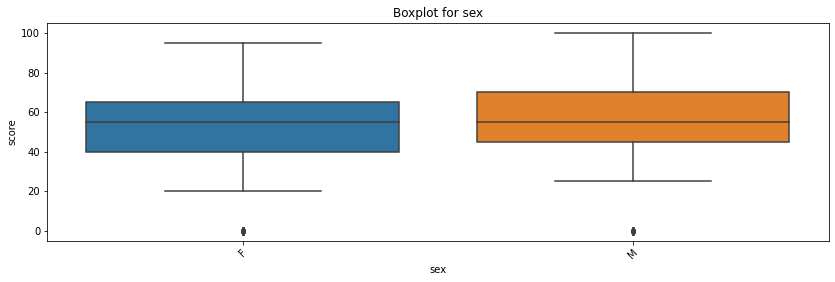

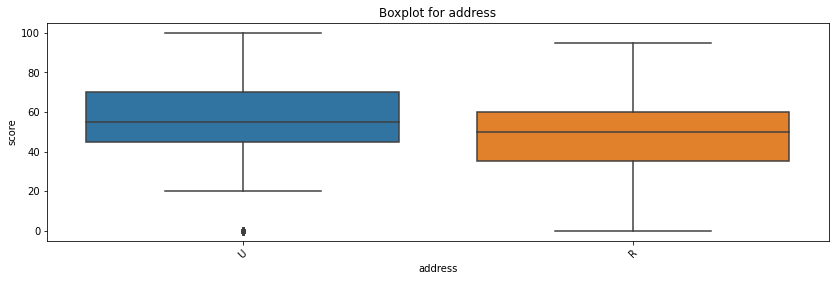

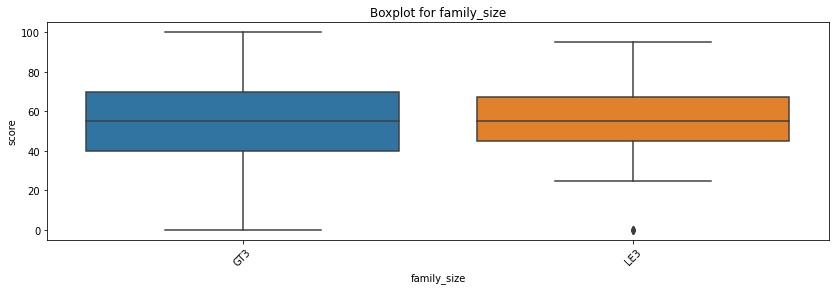

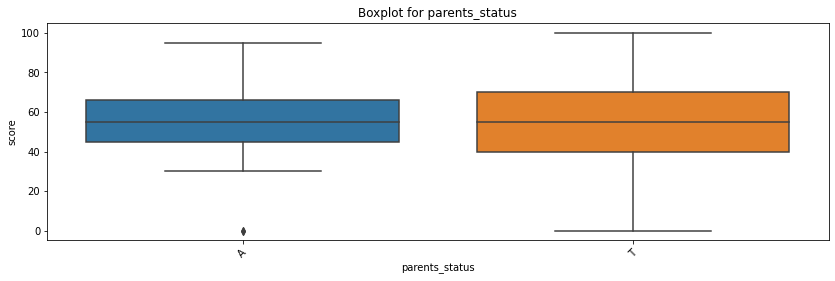

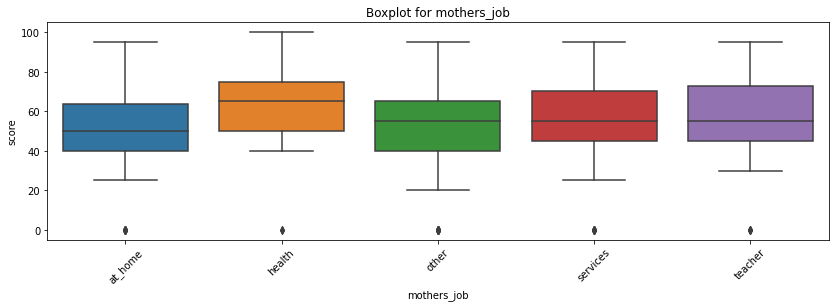

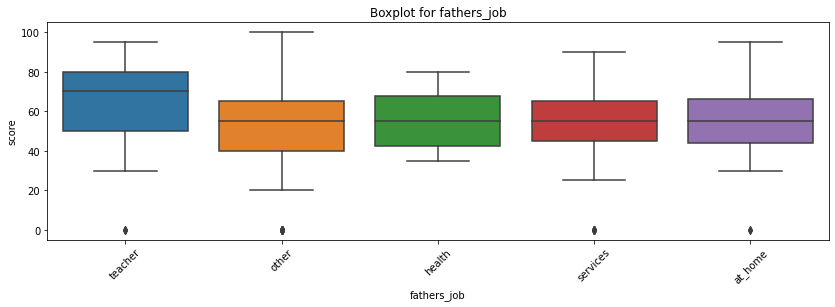

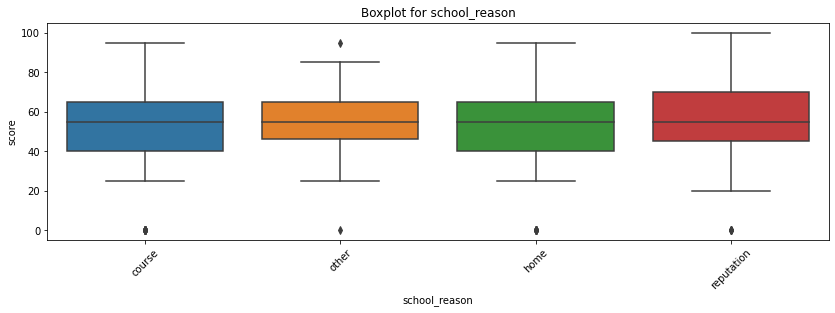

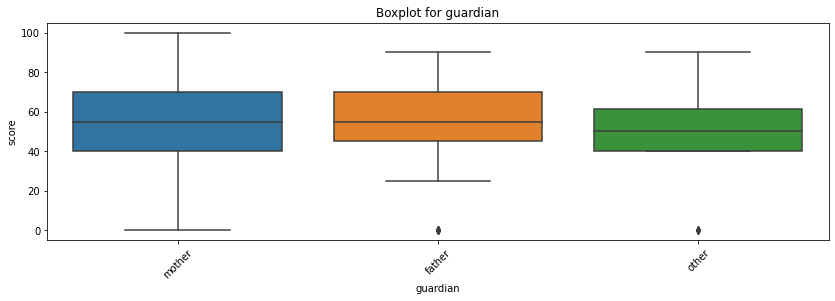

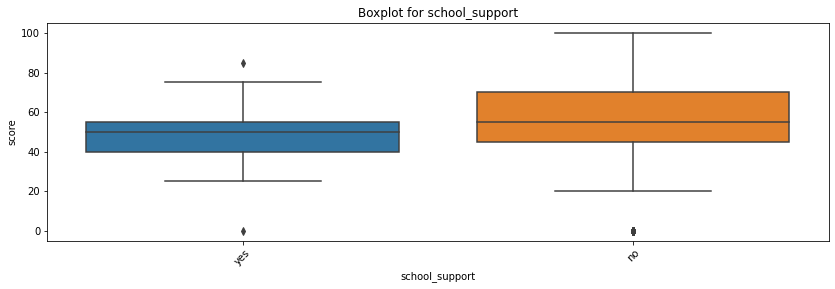

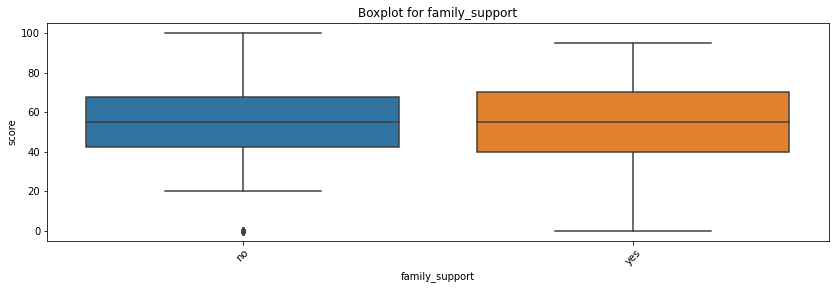

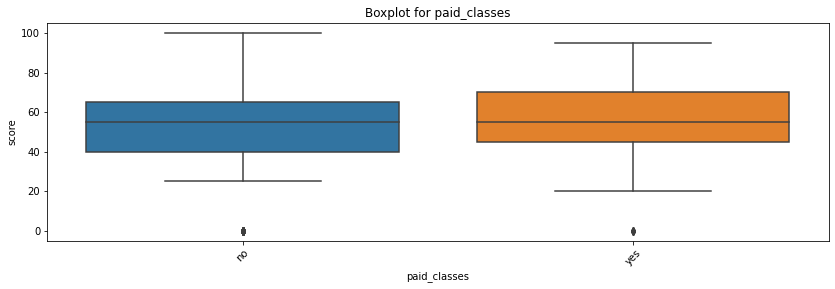

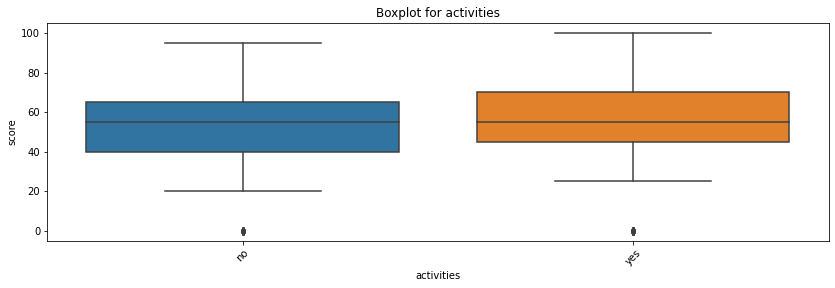

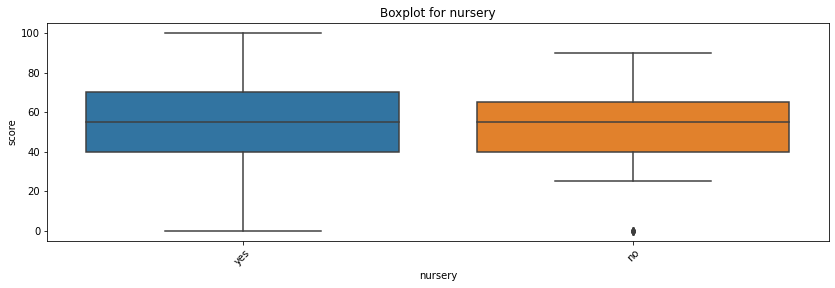

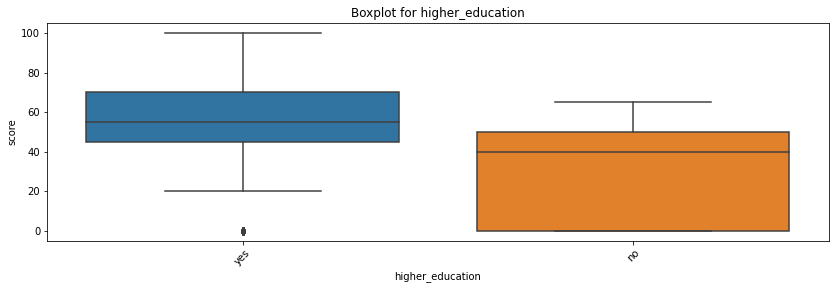

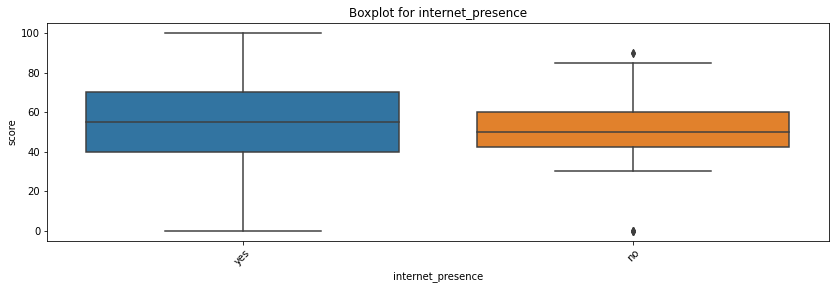

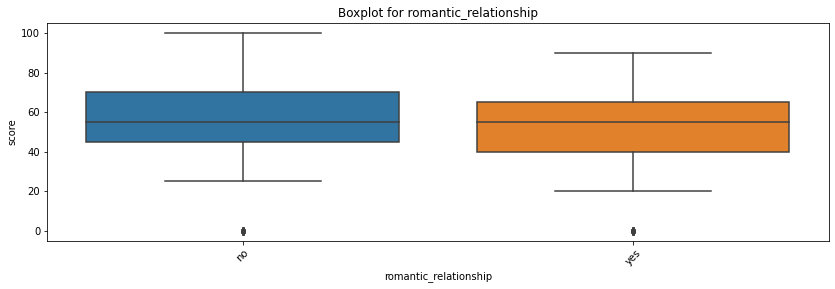

In [83]:
#Анализ номинативных переменных

#Посмотрим, различаются ли распределения оценок по математике в зависимости от значения 17 номинативных переменных. 

def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='score', 
                data=math,
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()
for col in ['school', 'sex','address', 'family_size', 'parents_status',
                'mothers_job', 'fathers_job',
                'school_reason', 'guardian', 
                'school_support', 'family_support', 'paid_classes','activities', 
                'nursery', 'higher_education', 'internet_presence','romantic_relationship']:
    get_boxplot(col)

In [84]:
#По графикам можно предположить, что параметрами, влияющими на оценку являются 
#address, mothers_job, higher_education 

#Проверим, есть ли статистическая разница в распределении оценок по номинативным признакам, с помощью теста Стьюдента:

def get_stat_dif(column):
    cols = math.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(math.loc[math.loc[:, column] == comb[0], 'score'], 
                        math.loc[math.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break
for col in ['school', 'sex','address', 'family_size', 'parents_status','mothers_job', 'fathers_job','school_reason', 'guardian', 'school_support', 'family_support', 'paid_classes','activities', 'nursery', 'higher_education', 'internet_presence','romantic_relationship']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки mothers_job
Найдены статистически значимые различия для колонки higher_education
Найдены статистически значимые различия для колонки romantic_relationship


In [86]:
#Оставим эти переменные в датасете для дальнейшего построения модели. 

#Итак, в нашем случае важные переменные, которые, возможно, оказывают влияние на оценку, это: 
#age, mothers_education, fathers_education, traveltime, studytime, failures, studytime_granular,
#family_relationship, free_time, going_out, health, absences, address, mothers_job, higher_education и romantic_relationship.

math_for_model = math.loc[:, ['age', 'mothers_education', 'fathers_education', 'traveltime', 'studytime', 'failures',
                              'family_relationship', 'free_time', 'going_out', 'health', 'absences', 'score','address', 
                              'mothers_job', 'higher_education','romantic_relationship']]
math_for_model.head()

,age,mothers_education,fathers_education,traveltime,studytime,failures,family_relationship,free_time,going_out,health,absences,score,address,mothers_job,higher_education,romantic_relationship
0,18,4.0,4.0,2.0,2.0,0.0,4.0,3.0,4.0,3.0,6.0,30.0,U,at_home,yes,no
1,17,1.0,1.0,1.0,2.0,0.0,5.0,3.0,3.0,3.0,4.0,30.0,U,at_home,yes,no
2,15,1.0,1.0,1.0,2.0,3.0,4.0,3.0,2.0,3.0,10.0,50.0,U,at_home,yes,no
3,15,4.0,2.0,1.0,3.0,0.0,3.0,2.0,2.0,5.0,2.0,75.0,U,health,yes,yes
4,16,3.0,3.0,1.0,2.0,0.0,4.0,3.0,2.0,5.0,4.0,50.0,U,other,yes,no


In [ ]:
#Подведем выводы в результате EDA для анализа влияния условий жизни учащихся на их успеваемость по математике:

#В данных достаточно много столбцов с пустыми значениями, только столбцы age, school и sex были заполнены полностью.
#Пустые данные в числовых столбцах были заменены на медианные значения, что может сказаться на дальнейшем анализе.
#В некоторых столбцах присутствовали опечатки (ошибки), которые мы заменили на показатели в нужном промежутке.
#Была выявлена строгая отрицательная корреляция между studytime и studytime_granular.
#Была выявлена положительная корреляция между fathers_education и mothers_education.
#Предполагается использоваться в дальнейшем следующие параметры: age, mothers_education, fathers_education, traveltime, 
#studytime, failures, family_relationship, free_time, going_out, health, absences, address, mothers_job, 
#higher_education и romantic_relationship.